# Library

In [91]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import string
from collections import Counter

In [92]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [93]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [94]:
df.to_csv(r"C:\Users\WINDOWS\Desktop\Reviews.csv")

In [95]:
df = pd.read_csv(r"C:\Users\WINDOWS\Desktop\Reviews.csv")

In [96]:
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [97]:
df = df.drop(columns='Unnamed: 0')

In [98]:
df.columns.str.split()

Index([['reviews']], dtype='object')

In [99]:
df.reviews.str.split()

0      [✅, Trip, Verified, |, On, a, recent, flight, ...
1      [✅, Trip, Verified, |, Flight, BA, 0560, arriv...
2      [✅, Trip, Verified, |, This, was, the, first, ...
3      [✅, Trip, Verified, |, Pretty, good, flight, b...
4      [✅, Trip, Verified, |, Check, in, was, fine,, ...
                             ...                        
995    [✅, Trip, Verified, |, This, was, the, worst, ...
996    [✅, Trip, Verified, |, London, to, Larnaca., N...
997    [Not, Verified, |, Gatwick, to, Orlando., Exce...
998    [✅, Trip, Verified, |, London, to, Munich., Th...
999    [✅, Trip, Verified, |, London, to, Glasgow., B...
Name: reviews, Length: 1000, dtype: object

In [100]:
df.reviews = df.reviews.str.replace('✅ Trip Verified','')

In [101]:
df.reviews.str.split()

0      [|, On, a, recent, flight, from, Cyprus, BA621...
1      [|, Flight, BA, 0560, arrived, in, Rome, on, 1...
2      [|, This, was, the, first, time, I, flew, Brit...
3      [|, Pretty, good, flight, but, still, some, sm...
4      [|, Check, in, was, fine,, but, no, priority/f...
                             ...                        
995    [|, This, was, the, worst, experience, I, have...
996    [|, London, to, Larnaca., New, A321neo,, 4.5, ...
997    [Not, Verified, |, Gatwick, to, Orlando., Exce...
998    [|, London, to, Munich., The, plane, is, A320....
999    [|, London, to, Glasgow., BA, customer, servic...
Name: reviews, Length: 1000, dtype: object

In [102]:
df

,reviews
0,| On a recent flight from Cyprus BA621 on 2...
1,| Flight BA 0560 arrived in Rome on 11 Dece...
2,| This was the first time I flew British Ai...
3,| Pretty good flight but still some small t...
4,"| Check in was fine, but no priority/fast tra..."
...,...
995,| This was the worst experience I have ever h...
996,"| London to Larnaca. New A321neo, 4.5 hour f..."
997,Not Verified | Gatwick to Orlando. Excellent ...
998,| London to Munich. The plane is A320. The s...


In [103]:
df['reviews'] = df['reviews'].str.lstrip('| ')


In [104]:
df

,reviews
0,On a recent flight from Cyprus BA621 on 23/11/...
1,Flight BA 0560 arrived in Rome on 11 December ...
2,This was the first time I flew British Airways...
3,Pretty good flight but still some small things...
4,"Check in was fine, but no priority/fast track ..."
...,...
995,This was the worst experience I have ever had ...
996,"London to Larnaca. New A321neo, 4.5 hour fligh..."
997,Not Verified | Gatwick to Orlando. Excellent ...
998,London to Munich. The plane is A320. The seat ...


In [105]:
# df['reviews'] = df['reviews'].str.replace('✅ Trip Verified','')
# df['reviews'] = df['reviews'].str.replace('Not Verified','')
# df['reviews'] = df['reviews'].str.lstrip(' |')
# df['reviews'] = df['reviews'].str.replace('[^a-zA-Z0-9]','')

In [106]:
# Nettoyer les commentaires
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '', regex=False)
df['reviews'] = df['reviews'].str.replace('Not Verified', '', regex=False)
df['reviews'] = df['reviews'].str.strip('|')  # Supprime le caractère '|' s'il est en début/fin de chaîne
df['reviews'] = df['reviews'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)  # Conserve uniquement les lettres, chiffres et espaces

# Supprimer les lignes où les commentaires sont devenus vides
df = df[df['reviews'].str.strip() != '']


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_15524\2566529334.py:5: SyntaxWarning: invalid escape sequence '\s'
  df['reviews'] = df['reviews'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)  # Conserve uniquement les lettres, chiffres et espaces


In [107]:
nbr_doublons = df.duplicated().sum()
nbr_doublons

0

In [108]:
df.isnull().sum()

reviews    0
dtype: int64

In [109]:
df

,reviews
0,On a recent flight from Cyprus BA621 on 231124...
1,Flight BA 0560 arrived in Rome on 11 December ...
2,This was the first time I flew British Airways...
3,Pretty good flight but still some small things...
4,Check in was fine but no priorityfast track li...
...,...
995,This was the worst experience I have ever had ...
996,London to Larnaca New A321neo 45 hour flight T...
997,Gatwick to Orlando Excellent customer servi...
998,London to Munich The plane is A320 The seat is...


In [110]:
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# # Supprimer les stopwords
# df['reviews'] = df['reviews'].apply(
#     lambda x: ' '.join([word for word in x.split() if word not in stop_words])
# )

In [111]:
# Télécharger les stopwords si nécessaire
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Supprimer les stopwords
df['reviews'] = df['reviews'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words]) if isinstance(x, str) else x
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
# from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# lemmatizer = WordNetLemmatizer()

# df['reviews'] = df['reviews'].apply(
#     lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
# )


In [113]:
from nltk.stem import WordNetLemmatizer
# Télécharger les ressources nécessaires pour lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Appliquer la lemmatisation
df['reviews'] = df['reviews'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]) if isinstance(x, str) else x
)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
# Tokeniser les commentaires
df['tokenized_comments'] = df['reviews'].apply(lambda x: word_tokenize(x.lower()) if isinstance(x, str) else [])


In [115]:
# # Tokenisation des commentaires
# from nltk.tokenize import word_tokenize
# df['tokenized_comments'] = df['reviews'].apply(word_tokenize)

In [116]:
# Supprimer les ponctuations et mots non alphabétiques
punctuation = set(string.punctuation)
df['tokenized_comments'] = df['tokenized_comments'].apply(
    lambda x: [word for word in x if word not in punctuation and word.isalpha()]
)


In [117]:
# # Tokenisation des commentaires
# df['tokenized_comments'] = df['reviews'].apply(lambda x: word_tokenize(x.lower()))  # Tout mettre en minuscule

# # Liste des signes de ponctuation à ignorer
# punctuation = set(string.punctuation)

# # Nettoyage : suppression des ponctuations et des apostrophes spéciales
# df['tokenized_comments'] = df['tokenized_comments'].apply(lambda x: [word for word in x if word not in punctuation and word.isalpha()])

# # Obtenir la liste de tous les mots dans les commentaires
# all_tokens = [word for tokens in df['tokenized_comments'] for word in tokens]

# # Compter la fréquence des mots
# word_counts = Counter(all_tokens)

# # Afficher les 10 mots les plus fréquents
# top_10_words = word_counts.most_common(10)
# print(top_10_words)

In [118]:
from collections import Counter

# Obtenir la liste de tous les mots
all_tokens = [word for tokens in df['tokenized_comments'] for word in tokens]

# Compter la fréquence des mots
word_counts = Counter(all_tokens)

# Afficher les 10 mots les plus fréquents
top_10_words = word_counts.most_common(10)
print(top_10_words)


[('i', 3156), ('flight', 2265), ('ba', 1281), ('the', 1087), ('seat', 808), ('service', 787), ('time', 670), ('hour', 600), ('london', 469), ('crew', 463)]


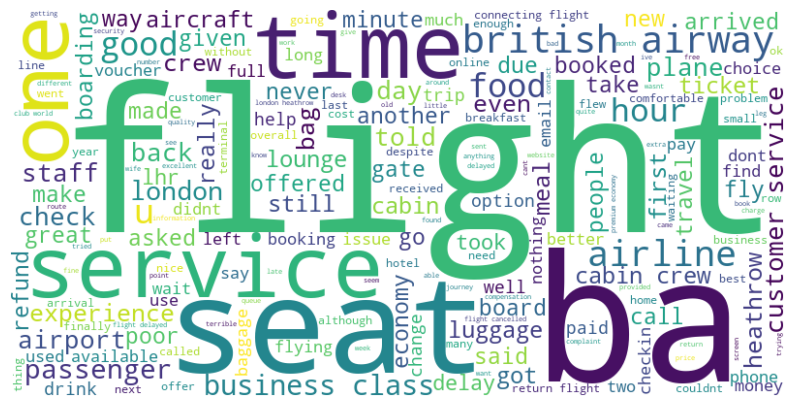

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Créer un texte à partir des commentaires tokenisés
all_words = ' '.join([' '.join(tokens) for tokens in df['tokenized_comments']])

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


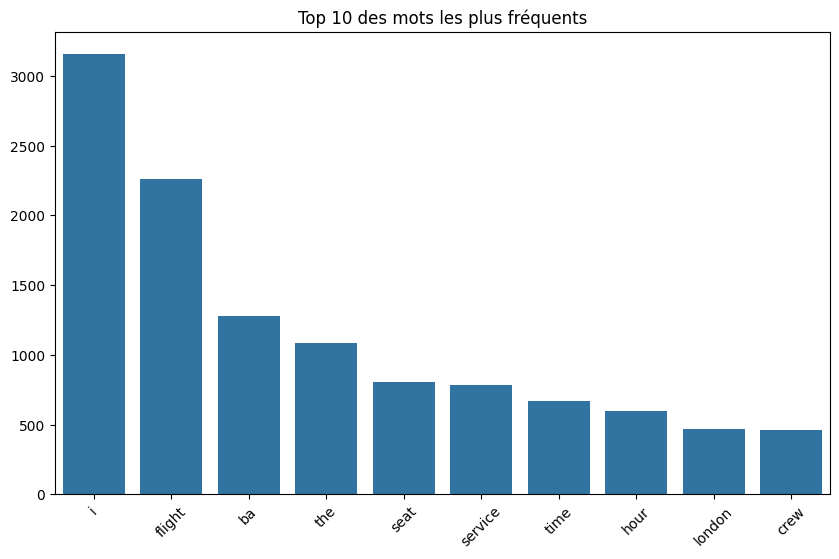

In [120]:
from collections import Counter

# Compter les mots
all_words = [word for tokens in df['tokenized_comments'] for word in tokens]
word_counts = Counter(all_words)

# Afficher les 10 mots les plus fréquents
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 des mots les plus fréquents')
plt.xticks(rotation=45)
plt.show()
